In [105]:
"""
Name: Eric Mass
Student Number: 24236422
"""
#Task 1: Data Characterisation & Preprocessing

import requests
import pandas as pd

response = requests.get("http://mlg.ucd.ie/modules/COMP30760/employees.csv")
with open("employees.csv", "wb") as file:
    file.write(response.content)
df = pd.read_csv('employees.csv')




Here I opened the file from the URL and loaded it into a Pandas Dataframe. I chose Dataframe because it is an efficient way to store data from a CSV, and it contains many built in useful operations.

In [107]:

#Task 1: Data Characterisation & Preprocessing

df = df.dropna(subset=['career_years'])
df = df[df['company_years'] >= 0]
df['travel_frequently'] = df['travel_frequently'].replace({'Y': 'Yes', 'N': 'No'})
outliers_count = {}

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1,Q3 = df[column].quantile(0.25),df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound,upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
   
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

for column, count in outliers_count.items():
    print(f"Number of outliers in '{column}': {count}")




df.describe()


Number of outliers in 'age': 0
Number of outliers in 'salary': 97
Number of outliers in 'company_years': 69
Number of outliers in 'career_years': 61
Number of outliers in 'distance': 149


,age,salary,company_years,career_years,distance
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,36.710668,75689.003837,5.778204,9.850345,19.147352
std,9.933107,54731.872406,5.466902,7.893970,25.699637
min,18.000000,11640.000000,0.000000,1.000000,3.000000
25%,29.000000,33751.500000,1.000000,4.000000,3.000000
50%,36.000000,57716.000000,5.000000,8.000000,9.000000
75%,43.000000,96140.500000,8.000000,13.000000,22.000000
max,62.000000,244622.000000,34.000000,39.000000,121.000000


I noticed that the "career_years" section had some entries that were nan (not a number) and were just empty commas. I decided to completely remove these entries from the data since I figured they were only 61 out of 1364 entries, I could afford to be rid of 61, especially since I can't really trust that data anyways. I wrote code to find the number of outliers (using the 1.5*IQR metric) and there were 379. However, I looked at the maximum and minimum for every category and all of them were feasible, except for eight values that had a -1 in the "company_years" category. I removed those data points because -1 is impossible. I also noticed that some of the Yes/No questions had responses that were Y or N, so I fixed that by changing the Y's to yes and N's to no. 

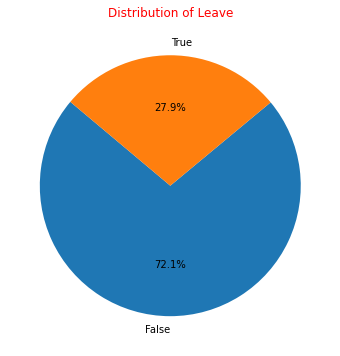

In [113]:
#Task 2a: Data Analysis
import matplotlib.pyplot as plt
leave_counts = df['leave'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(leave_counts, labels=leave_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Leave",color = 'red')
plt.show()

I simply used Matplotlib.pyplot to make a simple pie chart on who did and didn't leave. It is very clear that most people stay, but there is still plenty of data point for people who left.

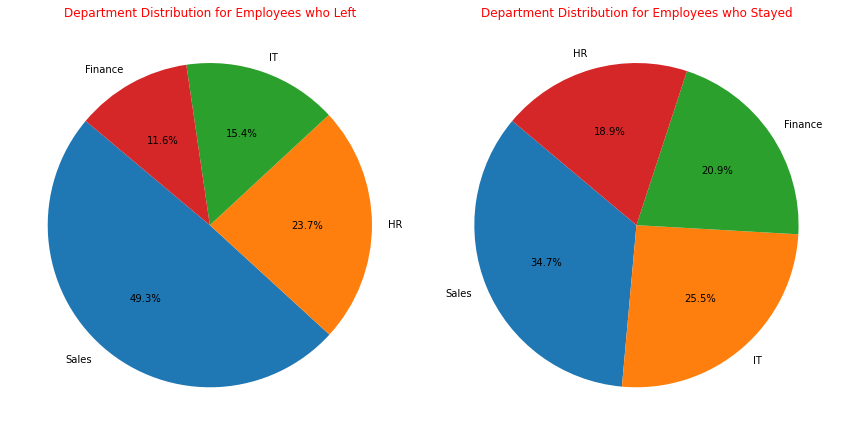

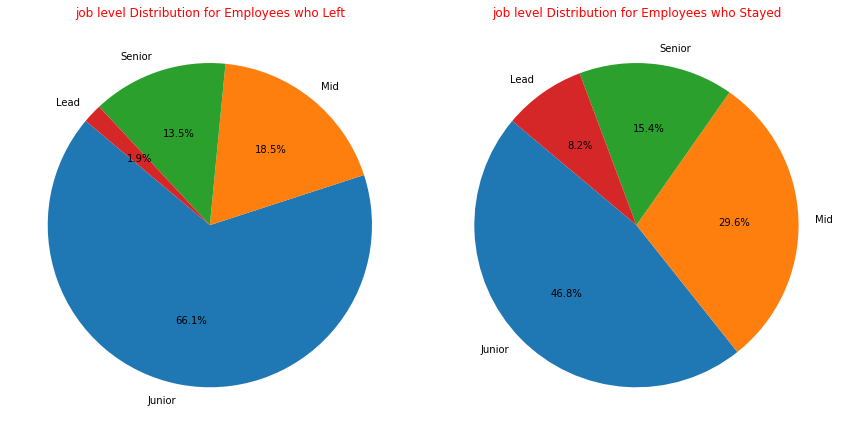

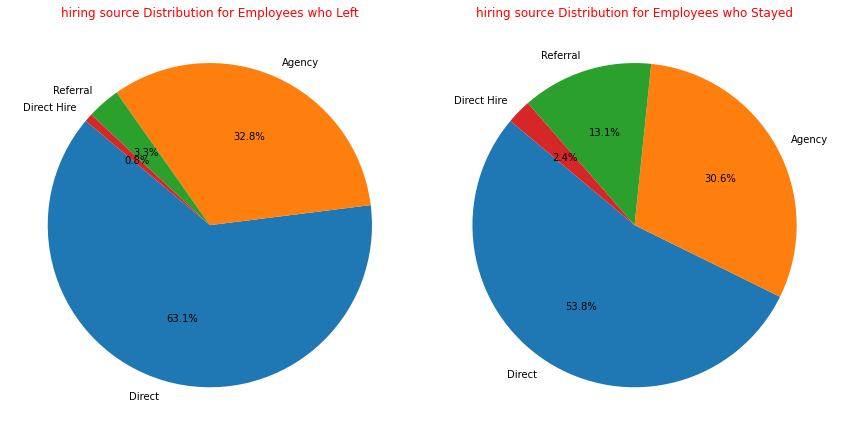

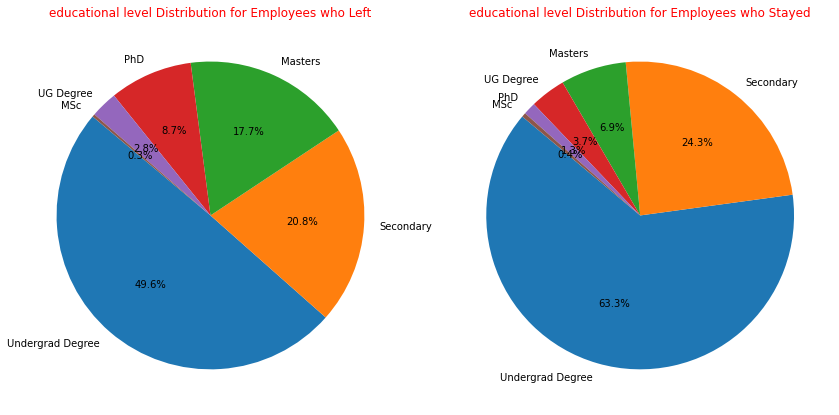

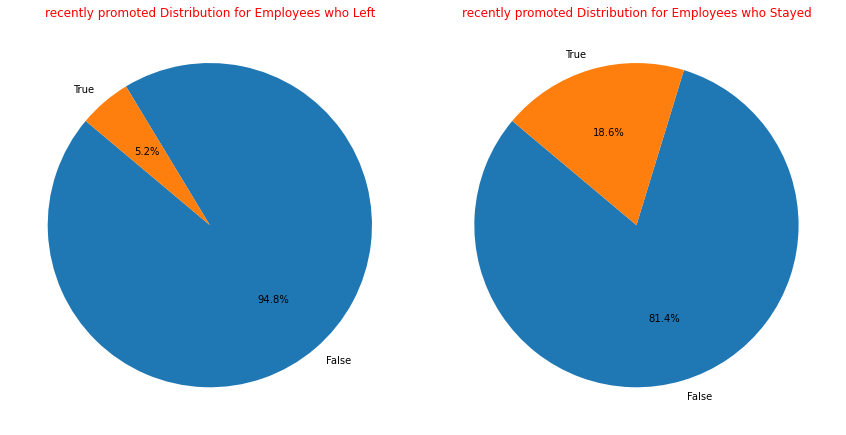

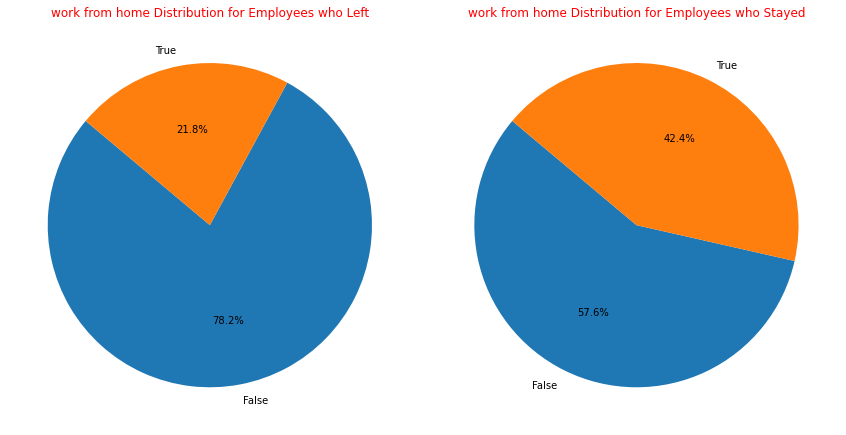

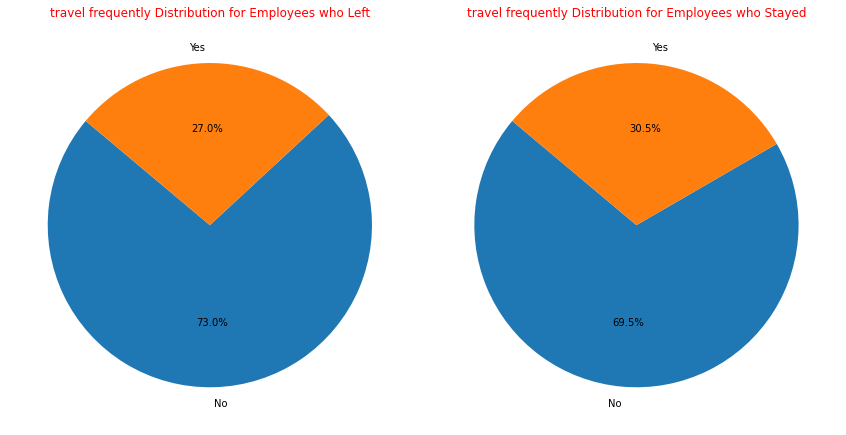

In [114]:
#Task 2b: Data Analysis, Categorical Features

leave_true = df[df['leave'] == True]
leave_false = df[df['leave'] == False]



#department
leave_true_counts = leave_true['department'].value_counts()
leave_false_counts = leave_false['department'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(leave_true_counts, labels=leave_true_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Department Distribution for Employees who Left", color='red')

plt.subplot(1, 2, 2)
plt.pie(leave_false_counts, labels=leave_false_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Department Distribution for Employees who Stayed", color='red')

plt.tight_layout()
plt.show()



#job_level
leave_true_counts = leave_true['job_level'].value_counts()
leave_false_counts = leave_false['job_level'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(leave_true_counts, labels=leave_true_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("job level Distribution for Employees who Left", color='red')

plt.subplot(1, 2, 2)
plt.pie(leave_false_counts, labels=leave_false_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("job level Distribution for Employees who Stayed", color='red')

plt.tight_layout()
plt.show()



#hiring_source
leave_true_counts = leave_true['hiring_source'].value_counts()
leave_false_counts = leave_false['hiring_source'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(leave_true_counts, labels=leave_true_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("hiring source Distribution for Employees who Left", color='red')

plt.subplot(1, 2, 2)
plt.pie(leave_false_counts, labels=leave_false_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("hiring source Distribution for Employees who Stayed", color='red')

plt.tight_layout()
plt.show()




#education_level
leave_true_counts = leave_true['education_level'].value_counts()
leave_false_counts = leave_false['education_level'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(leave_true_counts, labels=leave_true_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("educational level Distribution for Employees who Left", color='red')

plt.subplot(1, 2, 2)
plt.pie(leave_false_counts, labels=leave_false_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("educational level Distribution for Employees who Stayed", color='red')

plt.tight_layout()
plt.show()




#recently_promoted
leave_true_counts = leave_true['recently_promoted'].value_counts()
leave_false_counts = leave_false['recently_promoted'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(leave_true_counts, labels=leave_true_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("recently promoted Distribution for Employees who Left", color='red')

plt.subplot(1, 2, 2)
plt.pie(leave_false_counts, labels=leave_false_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("recently promoted Distribution for Employees who Stayed", color='red')

plt.tight_layout()
plt.show()





#work_from_home
leave_true_counts = leave_true['work_from_home'].value_counts()
leave_false_counts = leave_false['work_from_home'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(leave_true_counts, labels=leave_true_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("work from home Distribution for Employees who Left", color='red')

plt.subplot(1, 2, 2)
plt.pie(leave_false_counts, labels=leave_false_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("work from home Distribution for Employees who Stayed", color='red')

plt.tight_layout()
plt.show()



#travel_frequently
leave_true_counts = leave_true['travel_frequently'].value_counts()
leave_false_counts = leave_false['travel_frequently'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(leave_true_counts, labels=leave_true_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("travel frequently Distribution for Employees who Left", color='red')

plt.subplot(1, 2, 2)
plt.pie(leave_false_counts, labels=leave_false_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("travel frequently Distribution for Employees who Stayed", color='red')

plt.tight_layout()
plt.show()






These pie charts provide insights into how the categorical features are likely to affect whether an employee left or not. However, caution must be used when reading these charts. For example, the sales department is the largest department, and this is part of the reason why it makes up so much of the pie chart for the department category. When comparing both pie charts for the charts that represented people who left and stayed, we can see that the sales portion is bigger for employees who left, indicating that sales people are more likely to leave when compared to other jobs. Some other insights gained were that junior level employees were far more likely to leave, and all other career stages were much more likely to stay than juniors. I saw that hiring source has very little impact on whether or not an employee left, which makes sense intuitivly. People with just an undergraduate degree were more likely to stay, perhaps because they had less other job offers. The pie charts reveal that being recently promoted leads to one being more likely to stay, and so does working from home. Travel frequency had very little affect on whether an employee left or not. One thing to note is that if I was doing a more rigourous examination, I would have made a True/False pie chart for each different position at the company, each option for travel_frequently, each hiring source, each educational level, etc. 

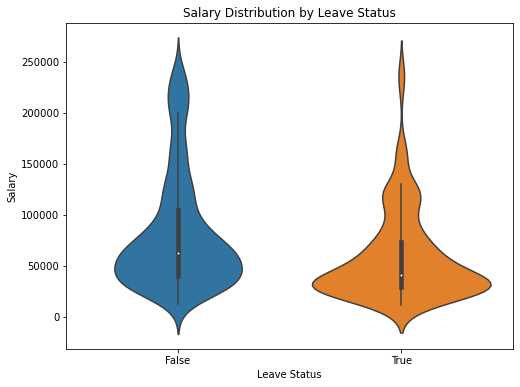

Correlation between Salary and Leave Status:
           salary     leave
salary  1.000000 -0.192033
leave  -0.192033  1.000000


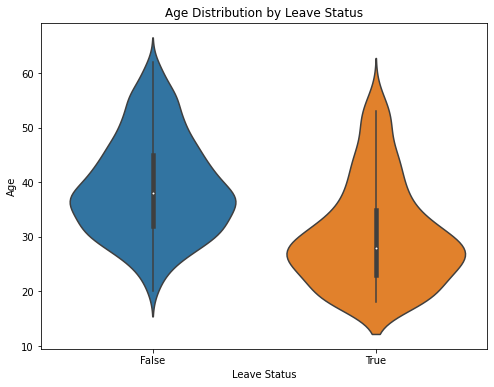

Correlation between Age and Leave Status:
             age     leave
age    1.000000 -0.402919
leave -0.402919  1.000000


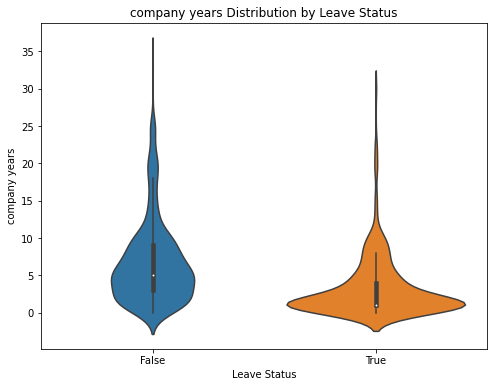

Correlation between company years and Leave Status:
                company_years     leave
company_years       1.000000 -0.286161
leave              -0.286161  1.000000


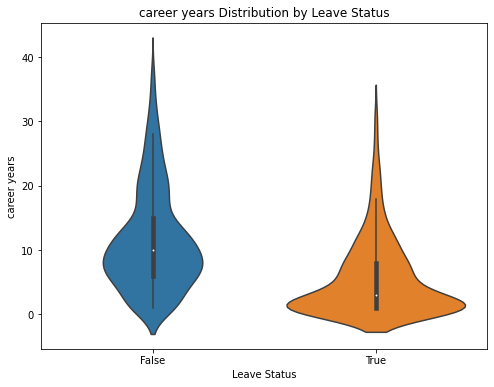

Correlation between career years and Leave Status:
               career_years    leave
career_years       1.00000 -0.33815
leave             -0.33815  1.00000


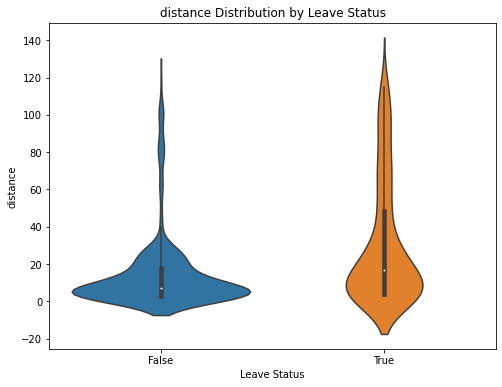

Correlation between distance and Leave Status:
           distance     leave
distance  1.000000  0.286778
leave     0.286778  1.000000


In [115]:
#Task 2c: Data Analysis, Numerical Features
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(x="leave", y="salary", data=df)
plt.title("Salary Distribution by Leave Status")
plt.xlabel("Leave Status")
plt.ylabel("Salary")
plt.show()

correlation = df[['salary', 'leave']].corr()
print("Correlation between Salary and Leave Status:\n", correlation)


plt.figure(figsize=(8, 6))
sns.violinplot(x="leave", y="age", data=df)
plt.title("Age Distribution by Leave Status")
plt.xlabel("Leave Status")
plt.ylabel("Age")
plt.show()

correlation = df[['age', 'leave']].corr()
print("Correlation between Age and Leave Status:\n", correlation)


plt.figure(figsize=(8, 6))
sns.violinplot(x="leave", y="company_years", data=df)
plt.title("company years Distribution by Leave Status")
plt.xlabel("Leave Status")
plt.ylabel("company years")
plt.show()

correlation = df[['company_years', 'leave']].corr()
print("Correlation between company years and Leave Status:\n", correlation)


plt.figure(figsize=(8, 6))
sns.violinplot(x="leave", y="career_years", data=df)
plt.title("career years Distribution by Leave Status")
plt.xlabel("Leave Status")
plt.ylabel("career years")
plt.show()

correlation = df[['career_years', 'leave']].corr()
print("Correlation between career years and Leave Status:\n", correlation)


plt.figure(figsize=(8, 6))
sns.violinplot(x="leave", y="distance", data=df)
plt.title("distance Distribution by Leave Status")
plt.xlabel("Leave Status")
plt.ylabel("distance")
plt.show()

correlation = df[['distance', 'leave']].corr()
print("Correlation between distance and Leave Status:\n", correlation)




I chose to use a violin plot to compare employees who did and didn't leave based on their distribution for some numeric features. Almost all of the numerical variables carried some sort of significant meaning. People who left had a lower mean and median salary, and very few people with a salary over 180,000$ left. People who left had lower mean and median ages, although the distributions were somewhat similar, and both very well spread out indicating the company had good age diversity. People who left had a much lower amount of years worked at the company, and it was a very tight distribution centered at just a few years. People who stayed had a much more spread out distribution of company years. The violin plots for career years told a similar story.Finally, the distance to work plots told an interesting story. Of the people who stayed, almost none of them lived over 40 km from work, whereas people who left had plenty of employees over 40 km away, and a decent amount even 100km away. These plots show that the numerical features will be very useful at predicting, especially at KNN.

In [166]:
#Task 3.1: Classification Model 1 (K Nearest Neighbors)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

#KNN using all numerical feautures
Alldata = df.iloc[:,[3,4,5,6,10]]
scaler = MinMaxScaler()
Alldata = scaler.fit_transform(Alldata)
target = df.iloc[:,-1]
train_data, test_data, train_target, test_target = train_test_split(Alldata,target,test_size = 0.2,random_state=5)
model = KNeighborsClassifier(n_neighbors=99)
model.fit(train_data,train_target)
predicted = model.predict(test_data)
cm = confusion_matrix(test_target,predicted)
print("model using all numerical data:")
print("confusion matrix:")
print(cm)
print("accuracy:")
print(accuracy_score(test_target,predicted))

#KNN using only age 
Agedata = df.iloc[:,[3]]
scaler = MinMaxScaler()
Agedata = scaler.fit_transform(Agedata)
target2 = df.iloc[:,-1]
train_data2, test_data2, train_target2, test_target2 = train_test_split(Agedata,target2,test_size = 0.2,random_state=5)
model2 = KNeighborsClassifier(n_neighbors=99)
model2.fit(train_data2,train_target2)
predicted2 = model2.predict(test_data2)
cm2 = confusion_matrix(test_target2,predicted2)
print("model using only age:")
print("confusion matrix:")
print(cm2)
print("accuracy:")
print(accuracy_score(test_target2,predicted2))

model using all numerical data:
confusion matrix:
[[183   6]
 [ 36  36]]
accuracy:
0.8390804597701149
model using only age:
confusion matrix:
[[175  14]
 [ 39  33]]
accuracy:
0.7969348659003831


This model works by first scaling each numerical quantity down so that the minimum value is 0 and the maximum is 1. This ensures that higher numbers like salary don't get weighted more heavily than low numbers such as company years. Next we consider the data of the point we are trying to predict. To do this, we look at its "K" closest neighbors as defined by euclidian distance, or the square root of the sum of the square of the differences in distance for each category. If a majority of the neighbors are employees who left, than the model will guess that this unknown data point has left. I chose a value of 99 for K because that was yielding accurate results and seemed appropriate for this dataset. I made two models. One for just age, and one for all the numerical things. The model was originally non-deterministic because the 80/20 split is randomized each run. However, I added the random state argument to ensure the same split every time. As enxpected, the model that uses all categories yeilds better results almost all of the time.

In [165]:
#Task 3.2: Classification Model 2 (Decision Tree)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

data = df.iloc[:,[3,5,6]]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
target = df.iloc[:,-1]
train_data, test_data, train_target, test_target = train_test_split(data,target,test_size = 0.2,random_state=5)
model = DecisionTreeClassifier()
model.fit(train_data,train_target)
predicted = model.predict(test_data)
cm = confusion_matrix(test_target,predicted)
print("Tree Model results using age, career years, and compamny years:")
print("confusion matrix:")
print(cm)
print("accuracy:")
print(accuracy_score(test_target,predicted))


data2 = df.iloc[:,[4,10]]
scaler = MinMaxScaler()
data2 = scaler.fit_transform(data2)
target2 = df.iloc[:,-1]
train_data2, test_data2, train_target2, test_target2 = train_test_split(data2,target2,test_size = 0.2,random_state=5)
model2 = DecisionTreeClassifier()
model2.fit(train_data2,train_target2)
predicted2 = model2.predict(test_data2)
cm2 = confusion_matrix(test_target2,predicted2)
print("Tree Model results using salary and distance:")
print("confusion matrix:")
print(cm2)
print("accuracy:")
print(accuracy_score(test_target2,predicted2))


Tree Model results using age, career years, and compamny years:
confusion matrix:
[[160  29]
 [ 36  36]]
accuracy:
0.7509578544061303
Tree Model results using salary and distance:
confusion matrix:
[[158  31]
 [ 41  31]]
accuracy:
0.7241379310344828


This binary classification model uses a Decision Tree Classifier to predict target labels based on selected features from the dataset. First, the input data, consisting of the numerical columns, is scaled using a MinMaxScaler for reasons described earlier. The target variable, representing the classification labels, is split along with the normalized data into training and testing sets using an 80-20 split through train_test_split. This is so that we use most of our data to build and improve the model, but leave plenty of data left to test it. The DecisionTreeClassifier is then trained on the training set, learning a series of hierarchical, rule-based decisions to classify the input data into one of two classes. It is called a tree because for each datapoint in the test data, it asks a series of questions that are meant to help eventually label it yes or no. After training, the model is evaluated on the test set by generating predictions and comparing them to the true labels. Performance metrics, such as a confusion matrix (which shows the breakdown of true positives, true negatives, false positives, and false negatives) and the accuracy score, are calculated to assess the effectiveness of the model in classifying the binary labels. I made one  model use age, company years, and career years. The other model only used salary and distance. The year based model worked better as I expected, probably because salary and distance had some weird distributions that may have messed with the model.

Overall, KNN did better thn the decesion tree model, probably because it is more quantitative, and makes better use of numerical data. In future work, I would incorporate some encoded categorical features so that they could play a part in the model. I chose not to include them in these models becasue they showed less predictive power in the plots I made, but they could still be useful. I would also like to experiment with different combinations of feature variables to see which ones hold the most predictive power, and more interestingly, which combinations of them have the most predictive power. My accuracies were at the highest, about 86% correct which I was happy with, as there was plently of overlap between distributions for even the most telling distributions, and so it would be impossible for the predictive power to be much higher.